In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv('home_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sales, test_size = 0.2)

# Single Feature Model

In [4]:
X = train[['sqft_living']] 
Y = train['price']

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
sqft_model = LinearRegression().fit(X,Y)

In [7]:
sqft_model.coef_

array([283.56726122])

In [8]:
sqft_model.intercept_

-48702.86037228478

# Prediction

In [9]:
print(test['price'].mean())

540653.4149895905


In [10]:
y_pred = sqft_model.predict(test[['sqft_living']])

In [11]:
y_pred[0:10]

array([753792.48887397, 722600.09014002, 742449.79842526, 331277.26965951,
       484403.5907171 , 322770.25182298, 492910.60855363, 509924.6442267 ,
       464553.88243186, 906918.80993156])

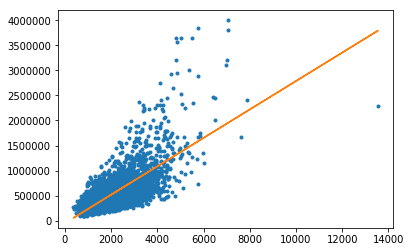

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test['sqft_living'], test['price'], '.', test['sqft_living'], 
         sqft_model.predict(test[['sqft_living']]),'-')

# Model with More features

In [13]:
features_list = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode']

In [14]:
X = train[features_list]
Y = train['price']

In [15]:
feature_model = LinearRegression().fit(X,Y)

In [16]:
y_pred = feature_model.predict(test[features_list])

In [17]:
y_pred[0:10]

array([796811.18870427, 675677.5019207 , 722031.14035259, 300107.66163807,
       491589.00708541, 391441.65083986, 465916.06820168, 508297.70354614,
       431823.34443212, 940039.69316668])

# Evaluation Metrics

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
mean_squared_error(test['price'], sqft_model.predict(test[['sqft_living']]))

65850186139.44902

In [20]:
mean_squared_error(test['price'], feature_model.predict(test[features_list]))

63337804538.21407

# Analyzing some results

In [21]:
df = train[features_list + ['price']]

In [22]:
sqft_model.predict([[3490]])

array([940946.88127769])

In [23]:
feature_model.predict([[4,2.25, 3490, 1.5, 98058]])

array([940929.23429564])

In [24]:
# Assignments -
# mean of the price of the houses with zipcode 98039
# percentage of houses with sqft_living in the range 2000 and 4000
# advanced_feature_model - bedrooms, bathrooms, sqft_living, sqft_lot,
# floors, zipcode, grade, condition, yr_built, lat, long, sqft_lot15, 
# sqft_living15, view, waterfront

In [25]:
df = sales[sales['zipcode']==98039]
df['price'].mean()

2160606.6

In [26]:
df = sales[(sales['sqft_living']>2000) & (sales['sqft_living']<=4000) ]
print (100.0 * len(df)/len(sales))

42.187572294452416


# Polynomial Regression

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

sales = pd.read_csv('home_data.csv')
train, test = train_test_split(sales, test_size = 0.2, random_state = 1)

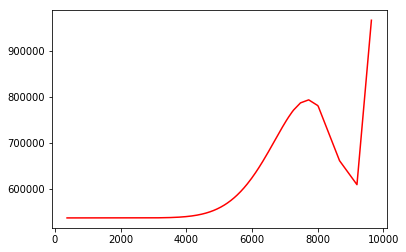

In [28]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
X = train[['sqft_living']]
y = train['price']

X = X.sort_values(by=['sqft_living'])

poly = PolynomialFeatures(degree = 12) 
X_poly = poly.fit_transform(X) 
    
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 

# Ridge Regression

c:\users\monsharm\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26474e-18): result may not be accurate.
  overwrite_a=True).T


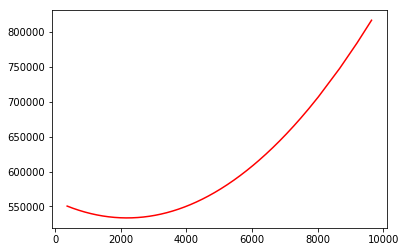

In [29]:
from sklearn.linear_model import Ridge
X = train[['sqft_living']]
y = train['price']

X = X.sort_values(by=['sqft_living'])

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
    
lin2 = Ridge(alpha=0.99) 
lin2.fit(X_poly, y)

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 

# Lasso Regression

c:\users\monsharm\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1082381653693954.8, tolerance: 216634152077.4742
  positive)


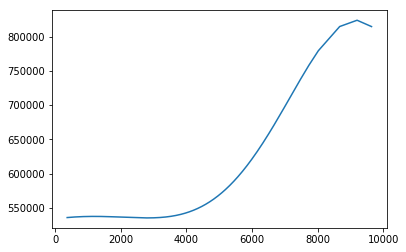

In [30]:
from sklearn.linear_model import Lasso
X = train[['sqft_living']]
y = train['price']

X = X.sort_values(by=['sqft_living'])

poly = PolynomialFeatures(degree = 10) 
X_poly = poly.fit_transform(X) 
    
lin2 = Lasso(alpha=0.1) 
lin2.fit(X_poly, y)

plt.plot(X, lin2.predict(poly.fit_transform(X))) 